# Analyzing Ford GoBike Data
Dec-2019

by Fernando de Moraes Gabriel

## Introduction
In this project, the Ford GoBike System Dateset that contains trip data from lyft's bike service for public use was analyzed.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.
> More about the data [here](https://www.fordgobike.com/system-data)

## Preliminary Wrangling

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime

> The csv files for the period January-June 2019 was downloaded to the author's computer and combined into the fordgobike_master.csv, using the glob and the Dataset functions:
>
>path = '../data/'
>
>files = glob.glob(os.path.join(path, "*.csv"))
>
>df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
>
>df.to_csv('fordgobike_master.csv', index = False)


In [3]:
df = pd.read_csv('fordgobike_master.csv', sep=',')
df.head()

/home/fernando/anaconda3/envs/Udacity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,1989.0,Male,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,1989.0,Male,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,1965.0,Female,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,1974.0,Male,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,NaN,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


In [4]:
# Understanding the dataset
df.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
67750,5540,No,636,17.0,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2019-01-23 19:07:46.4680,1988.0,Male,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2019-01-23 18:57:10.2650,Subscriber
1067973,3441,No,556,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2019-05-31 09:10:18.3230,1990.0,Male,NaN,19.0,37.788975,-122.403452,Post St at Kearny St,2019-05-31 09:01:01.4830,Subscriber
999570,4953,No,356,27.0,37.788059,-122.391865,Beale St at Harrison St,2019-02-11 17:17:22.6730,1992.0,Male,NaN,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2019-02-11 17:11:25.7290,Subscriber
295226,3623,No,180,104.0,37.767045,-122.390833,4th St at 16th St,2019-06-14 06:45:29.5900,NaN,NaN,NaN,345.0,37.766483,-122.398279,Hubbell St at 16th St,2019-06-14 06:42:29.4610,Subscriber
1045222,5133,No,206,88.0,37.770030,-122.411726,11th St at Bryant St,2019-02-04 21:00:47.4700,1994.0,Male,NaN,336.0,37.763281,-122.407377,Potrero Ave and Mariposa St,2019-02-04 20:57:21.1870,Subscriber
57367,2275,No,481,133.0,37.755213,-122.420975,Valencia St at 22nd St,2019-01-24 22:01:24.6550,1984.0,Male,NaN,119.0,37.761047,-122.432642,18th St at Noe St,2019-01-24 21:53:23.5400,Subscriber
248779,357,No,189,243.0,37.869360,-122.254337,Bancroft Way at College Ave,2019-06-21 14:57:08.7210,1990.0,Female,NaN,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2019-06-21 14:53:59.1940,Subscriber
717795,5021,No,825,92.0,37.772301,-122.393028,Mission Bay Kids Park,2019-03-20 17:35:50.4630,1975.0,Male,NaN,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2019-03-20 17:22:04.7110,Subscriber
618072,6964,No,451,141.0,37.747998,-122.420219,Valencia St at Cesar Chavez St,2019-04-01 14:32:36.7490,1993.0,Male,NaN,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-04-01 14:25:05.4620,Subscriber
519222,5105,No,444,80.0,37.775235,-122.397437,Townsend St at 5th St,2019-04-11 10:39:25.5130,1994.0,Male,NaN,26.0,37.787290,-122.394380,1st St at Folsom St,2019-04-11 10:32:00.9400,Subscriber


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244839 entries, 0 to 1244838
Data columns (total 17 columns):
bike_id                    1244839 non-null int64
bike_share_for_all_trip    1240946 non-null object
duration_sec               1244839 non-null int64
end_station_id             1241832 non-null float64
end_station_latitude       1244839 non-null float64
end_station_longitude      1244839 non-null float64
end_station_name           1241832 non-null object
end_time                   1244839 non-null object
member_birth_year          1176326 non-null float64
member_gender              1176550 non-null object
rental_access_method       3893 non-null object
start_station_id           1241934 non-null float64
start_station_latitude     1244839 non-null float64
start_station_longitude    1244839 non-null float64
start_station_name         1241934 non-null object
start_time                 1244839 non-null object
user_type                  1244839 non-null object
dtypes: float64(7)

In [6]:
df.shape

(1244839, 17)

In [7]:
# check duplicates
df.duplicated().sum()

0

In [8]:
# check NaN values
df.isna().sum()

bike_id                          0
bike_share_for_all_trip       3893
duration_sec                     0
end_station_id                3007
end_station_latitude             0
end_station_longitude            0
end_station_name              3007
end_time                         0
member_birth_year            68513
member_gender                68289
rental_access_method       1240946
start_station_id              2905
start_station_latitude           0
start_station_longitude          0
start_station_name            2905
start_time                       0
user_type                        0
dtype: int64

### Cleaning Data
After the assessing data process, it was possible identify some quality issues to be cleaned for the analysis, these are described below:

In [9]:
# Copying the dataset
df_clean = df.copy()

#### There are not appropiate data types for some columns
##### Define
- Convert the following columns to string: start_station_id, end_station_id and bike_id
- Convert the following columns to timestamp: start_time and end_time
- Convert the following column to integer: member_birth_year
- Convert the following column to category: user_type, member_gender and bike_share_for_all_trip

##### Code

In [10]:
def change_to_string(df,fields):
    for field in fields:
        df[field] = df[field].astype(np.object)


def change_to_timestamp(df,fields):
    for field in fields:
        df[field] = df[field].astype('datetime64[ns]')


def change_to_category(df,fields):
    for field in fields:
        df[field] = df[field].astype('category')

In [11]:
change_to_string (df_clean,['start_station_id', 'end_station_id','bike_id'])
change_to_timestamp (df_clean,['start_time', 'end_time'])
change_to_category (df_clean,['user_type', 'member_gender', 'bike_share_for_all_trip'])

##### Test

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244839 entries, 0 to 1244838
Data columns (total 17 columns):
bike_id                    1244839 non-null object
bike_share_for_all_trip    1240946 non-null category
duration_sec               1244839 non-null int64
end_station_id             1241832 non-null object
end_station_latitude       1244839 non-null float64
end_station_longitude      1244839 non-null float64
end_station_name           1241832 non-null object
end_time                   1244839 non-null datetime64[ns]
member_birth_year          1176326 non-null float64
member_gender              1176550 non-null category
rental_access_method       3893 non-null object
start_station_id           1241934 non-null object
start_station_latitude     1244839 non-null float64
start_station_longitude    1244839 non-null float64
start_station_name         1241934 non-null object
start_time                 1244839 non-null datetime64[ns]
user_type                  1244839 non-null catego

#### There are some missing values
##### Define
- Drop the rows with nulls start_station_id or end_station_id
- Drop the rows with null member_birth_year
- Drop the column rental_access_method

#### Code

In [13]:
df_clean.start_station_id.isna().sum()

2905

In [14]:
df_clean.drop(df_clean[df_clean['start_station_id'].isnull()].index, inplace = True)

In [15]:
df_clean.end_station_id.isna().sum()

543

In [16]:
df_clean.drop(df_clean[df_clean['end_station_id'].isnull()].index, inplace = True)

In [17]:
df_clean.drop(df_clean[df_clean['member_birth_year'].isnull()].index, inplace = True)

df_clean = df_clean.drop(['rental_access_method'], axis=1)


##### Test

In [18]:
df_clean.isna().sum()

bike_id                       0
bike_share_for_all_trip    1025
duration_sec                  0
end_station_id                0
end_station_latitude          0
end_station_longitude         0
end_station_name              0
end_time                      0
member_birth_year             0
member_gender                 0
start_station_id              0
start_station_latitude        0
start_station_longitude       0
start_station_name            0
start_time                    0
user_type                     0
dtype: int64

#### Adding interesting columns in the dataset
##### Define
- Add a column for the member age, calculating it by subtracting their birth year from the current year (2019)
- Add columns for the start month and day of the week
- Add a column for the duration in minutes

#### Code

In [19]:
# Member Age
current_year = 2019
df_clean['member_age'] = current_year - df_clean['member_birth_year']

# Start month
df_clean['start_month'] = df_clean['start_time'].dt.strftime('%B')

# Start weekday
df_clean['start_weekday'] = df_clean['start_time'].dt.strftime('%a')

# Duration in minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60

##### Test

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173832 entries, 0 to 1244838
Data columns (total 20 columns):
bike_id                    1173832 non-null object
bike_share_for_all_trip    1172807 non-null category
duration_sec               1173832 non-null int64
end_station_id             1173832 non-null object
end_station_latitude       1173832 non-null float64
end_station_longitude      1173832 non-null float64
end_station_name           1173832 non-null object
end_time                   1173832 non-null datetime64[ns]
member_birth_year          1173832 non-null float64
member_gender              1173832 non-null category
start_station_id           1173832 non-null object
start_station_latitude     1173832 non-null float64
start_station_longitude    1173832 non-null float64
start_station_name         1173832 non-null object
start_time                 1173832 non-null datetime64[ns]
user_type                  1173832 non-null category
member_age                 1173832 non-null f

In [21]:
df_clean.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age,start_month,start_weekday,duration_min
864098,4610,No,1406,85,37.770083,-122.429156,Church St at Duboce Ave,2019-03-03 17:59:08.455,1968.0,Male,358,37.729279,-122.392896,Williams Ave at 3rd St,2019-03-03 17:35:41.649,Subscriber,51.0,March,Sun,23.433333
992715,4927,No,453,368,37.785434,-122.419622,Myrtle St at Polk St,2019-02-12 12:16:01.231,1979.0,Female,42,37.778650,-122.418230,San Francisco City Hall (Polk St at Grove St),2019-02-12 12:08:28.226,Subscriber,40.0,February,Tue,7.550000
982225,3853,Yes,425,280,37.337122,-121.883215,San Fernando St at 7th St,2019-02-14 15:22:56.865,1993.0,Female,296,37.325998,-121.877120,5th St at Virginia St,2019-02-14 15:15:51.336,Subscriber,26.0,February,Thu,7.083333
968887,6253,No,1951,33,37.781650,-122.415408,Golden Gate Ave at Hyde St,2019-02-16 15:10:55.221,1995.0,Male,76,37.771662,-122.422423,McCoppin St at Valencia St,2019-02-16 14:38:24.178,Customer,24.0,February,Sat,32.516667
926412,4504,No,324,257,37.870407,-122.299676,Fifth St at Delaware St,2019-02-22 09:09:25.239,1980.0,Male,250,37.873558,-122.283093,North Berkeley BART Station,2019-02-22 09:04:00.648,Subscriber,39.0,February,Fri,5.400000
1010009,3290,No,509,385,37.850578,-122.278175,Woolsey St at Sacramento St,2019-02-09 15:47:24.081,1990.0,Male,155,37.840521,-122.293528,Emeryville Public Market,2019-02-09 15:38:54.557,Subscriber,29.0,February,Sat,8.483333
1134919,1963,No,753,156,37.838443,-122.288665,Stanford Ave at Hollis St,2019-05-20 08:22:31.633,1992.0,Male,176,37.828410,-122.266315,MacArthur BART Station,2019-05-20 08:09:57.925,Subscriber,27.0,May,Mon,12.550000
525121,2967,No,766,285,37.783521,-122.431158,Webster St at O'Farrell St,2019-04-10 19:24:17.020,1993.0,Male,5,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2019-04-10 19:11:30.993,Subscriber,26.0,April,Wed,12.766667
1038883,4804,No,644,78,37.773717,-122.411647,Folsom St at 9th St,2019-02-05 17:57:19.909,1973.0,Female,67,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2019-02-05 17:46:35.855,Subscriber,46.0,February,Tue,10.733333
888905,5775,No,463,7,37.804562,-122.271738,Frank H Ogawa Plaza,2019-02-28 06:37:28.153,1986.0,Female,230,37.810743,-122.291415,14th St at Mandela Pkwy,2019-02-28 06:29:44.693,Subscriber,33.0,February,Thu,7.716667


In [22]:
df_clean.isna().sum()

bike_id                       0
bike_share_for_all_trip    1025
duration_sec                  0
end_station_id                0
end_station_latitude          0
end_station_longitude         0
end_station_name              0
end_time                      0
member_birth_year             0
member_gender                 0
start_station_id              0
start_station_latitude        0
start_station_longitude       0
start_station_name            0
start_time                    0
user_type                     0
member_age                    0
start_month                   0
start_weekday                 0
duration_min                  0
dtype: int64

In [23]:
df_clean.member_age.describe()

count    1.173832e+06
mean     3.431187e+01
std      1.011861e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.200000e+01
75%      3.900000e+01
max      1.410000e+02
Name: member_age, dtype: float64

#### Save the cleaned dataset

In [24]:
df_clean.to_csv('fordgobike_master_cleaned.csv', index = False)

### What is the structure of your dataset?

The column header descriptions are as follows:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or - “Customer” = Casual)
- Member Year of Birth
- Member Gender

It was added the following columns:
- Member Age
- Start Month
- Start Weekday
- Duration Min

### What is/are the main feature(s) of interest in your dataset?
The features related to time duration, start and end of a trip, age and gender are very interesting to use to make business decisions such as which day of the week bikes should be most available.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The member age, user type and related time-based information will be utilized.

## Univariate Exploration


In [25]:
df = pd.read_csv("fordgobike_master_cleaned.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173832 entries, 0 to 1173831
Data columns (total 20 columns):
bike_id                    1173832 non-null int64
bike_share_for_all_trip    1172807 non-null object
duration_sec               1173832 non-null int64
end_station_id             1173832 non-null float64
end_station_latitude       1173832 non-null float64
end_station_longitude      1173832 non-null float64
end_station_name           1173832 non-null object
end_time                   1173832 non-null object
member_birth_year          1173832 non-null float64
member_gender              1173832 non-null object
start_station_id           1173832 non-null float64
start_station_latitude     1173832 non-null float64
start_station_longitude    1173832 non-null float64
start_station_name         1173832 non-null object
start_time                 1173832 non-null object
user_type                  1173832 non-null object
member_age                 1173832 non-null float64
start_month   

In [26]:
# changing data type again
change_to_string (df,['start_station_id', 'end_station_id','bike_id'])
change_to_timestamp (df,['start_time', 'end_time'])
change_to_category (df,['user_type', 'member_gender', 'bike_share_for_all_trip'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173832 entries, 0 to 1173831
Data columns (total 20 columns):
bike_id                    1173832 non-null object
bike_share_for_all_trip    1172807 non-null category
duration_sec               1173832 non-null int64
end_station_id             1173832 non-null object
end_station_latitude       1173832 non-null float64
end_station_longitude      1173832 non-null float64
end_station_name           1173832 non-null object
end_time                   1173832 non-null datetime64[ns]
member_birth_year          1173832 non-null float64
member_gender              1173832 non-null category
start_station_id           1173832 non-null object
start_station_latitude     1173832 non-null float64
start_station_longitude    1173832 non-null float64
start_station_name         1173832 non-null object
start_time                 1173832 non-null datetime64[ns]
user_type                  1173832 non-null category
member_age                 1173832 non-null f

In [27]:
df.describe()

,duration_sec,end_station_latitude,end_station_longitude,member_birth_year,start_station_latitude,start_station_longitude,member_age,duration_min
count,1.173832e+06,1.173832e+06,1.173832e+06,1.173832e+06,1.173832e+06,1.173832e+06,1.173832e+06,1.173832e+06
mean,7.501220e+02,3.776928e+01,-1.223503e+02,1.984688e+03,3.776969e+01,-1.223525e+02,3.431187e+01,1.250203e+01
std,1.700208e+03,1.791745e-01,4.934571e-01,1.011861e+01,1.070743e-01,1.637495e-01,1.011861e+01,2.833680e+01
min,6.100000e+01,0.000000e+00,-1.224537e+02,1.878000e+03,0.000000e+00,-1.224537e+02,1.800000e+01,1.016667e+00
25%,3.410000e+02,3.777041e+01,-1.224117e+02,1.980000e+03,3.777041e+01,-1.224124e+02,2.700000e+01,5.683333e+00
50%,5.420000e+02,3.778095e+01,-1.223974e+02,1.987000e+03,3.778079e+01,-1.223983e+02,3.200000e+01,9.033333e+00
75%,8.430000e+02,3.779728e+01,-1.222912e+02,1.992000e+03,3.779728e+01,-1.222894e+02,3.900000e+01,1.405000e+01
max,8.611400e+04,3.788022e+01,0.000000e+00,2.001000e+03,3.788022e+01,0.000000e+00,1.410000e+02,1.435233e+03


In [28]:
df.member_age.describe()

count    1.173832e+06
mean     3.431187e+01
std      1.011861e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.200000e+01
75%      3.900000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [29]:
df.member_age.describe(percentiles = [.99])

count    1.173832e+06
mean     3.431187e+01
std      1.011861e+01
min      1.800000e+01
50%      3.200000e+01
99%      6.400000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [30]:
# So it looks like 99% of users are under the age of 64
# Only keep the rows where riders were under 64 years of age for the analysis
df = df.query('member_age <= 64')

In [31]:
df.member_age.mean()

33.966529052421485

In [32]:
df.member_age.max()

64.0

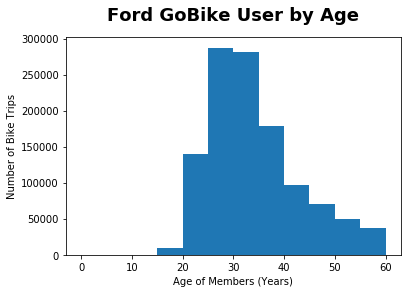

In [33]:
# Age group data
bin_edges = np.arange(0, 65, 5)

plt.hist(data = df, x = 'member_age', bins = bin_edges);

plt.title("Ford GoBike User by Age", y=1.05, fontsize=18, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

> Observation 1: The mean age  of a Ford GoBike user is 34 years old. The data was cleaned, using for the analysis users under the age 65. The histogram shows the majority of users are adults between 25-40 years old.

In [34]:
df.start_month.describe()

count     1163397
unique          6
top         March
freq       242356
Name: start_month, dtype: object

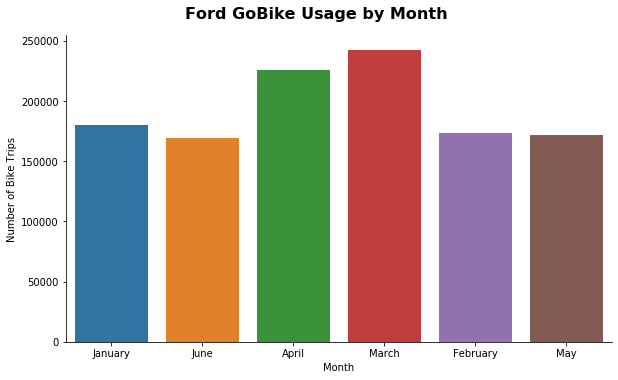

In [35]:
# Monthly usage of the Ford GoBike
graph = sb.catplot(data = df, x = 'start_month', kind = 'count', aspect = 1.7);

graph.set_axis_labels('Month', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');